In [2]:
import pickle
import numpy as np

In [4]:
with open('train_qa.txt','rb') as f:
    train_data = pickle.load(f)

In [5]:
with open('test_qa.txt','rb') as f:
    test_data = pickle.load(f)

In [6]:
type(test_data)

list

In [7]:
len(train_data)

10000

In [9]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [10]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [12]:
train_data[0][2]

'no'

In [13]:
all_data = test_data + train_data

In [14]:
len(all_data)

11000

In [16]:
vocab = set()
for story,question,answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [17]:
vocab.add('yes')
vocab.add('no')

In [18]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [19]:
vocab_len = len(vocab) + 1 #1 for placeholder

In [20]:
vocab_len

38

In [22]:
#Longest story
all_story_lens = [len(data[0]) for data in all_data]

In [24]:
max_story_len = max(all_story_lens)

In [28]:
max_question_len = max([len(data[1]) for data in all_data])

In [29]:
max_question_len

6

In [30]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [31]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [32]:
tokenizer.word_index

{'john': 1,
 'discarded': 2,
 'left': 3,
 'garden': 4,
 'mary': 5,
 'up': 6,
 'hallway': 7,
 'no': 8,
 'back': 9,
 'kitchen': 10,
 'milk': 11,
 'grabbed': 12,
 'picked': 13,
 'apple': 14,
 'went': 15,
 '?': 16,
 'to': 17,
 'got': 18,
 '.': 19,
 'yes': 20,
 'dropped': 21,
 'football': 22,
 'in': 23,
 'took': 24,
 'is': 25,
 'journeyed': 26,
 'bedroom': 27,
 'daniel': 28,
 'there': 29,
 'office': 30,
 'moved': 31,
 'put': 32,
 'the': 33,
 'travelled': 34,
 'down': 35,
 'bathroom': 36,
 'sandra': 37}

In [34]:
train_story_text = []
train_question_text = []
train_answers = []


In [35]:
for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [38]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [43]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len,max_question_len=max_question_len):
    
    
    # X = STORIES
    X = []
    # Xq = QUERY/QUESTION
    Xq = []
    # Y = CORRECT ANSWER
    Y = []
    
    
    for story, query, answer in data:
        
        # Grab the word index for every word in story
        x = [word_index[word.lower()] for word in story]
        # Grab the word index for every word in query
        xq = [word_index[word.lower()] for word in query]
        
        # Grab the Answers (either Yes/No so we don't need to use list comprehension here)
        # Index 0 is reserved so we're going to use + 1
        y = np.zeros(len(word_index) + 1)
        
        # Now that y is all zeros and we know its just Yes/No , we can use numpy logic to create this assignment
        #
        y[word_index[answer]] = 1
        
        # Append each set of story,query, and answer to their respective holding lists
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    # Finally, pad the sequences based on their max length so the RNN can be trained on uniformly long sequences.
        
    # RETURN TUPLE FOR UNPACKING
    return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [44]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [45]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [46]:
inputs_test

array([[ 0,  0,  0, ..., 33, 27, 19],
       [ 0,  0,  0, ..., 33,  4, 19],
       [ 0,  0,  0, ..., 33,  4, 19],
       ...,
       [ 0,  0,  0, ..., 33, 14, 19],
       [ 0,  0,  0, ..., 33,  4, 19],
       [ 0,  0,  0, ..., 14, 29, 19]])

In [47]:
inputs_train

array([[ 0,  0,  0, ..., 33, 27, 19],
       [ 0,  0,  0, ..., 33,  7, 19],
       [ 0,  0,  0, ..., 33, 36, 19],
       ...,
       [ 0,  0,  0, ..., 33, 27, 19],
       [ 0,  0,  0, ..., 11, 29, 19],
       [ 0,  0,  0, ..., 14, 29, 19]])

In [48]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 503.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 497.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [50]:
from keras.models import Sequential,Model

In [51]:
from keras.layers.embeddings import Embedding

In [52]:
from keras.layers import Input,Activation,Dense,Permute,Dropout,add,dot,concatenate,LSTM

In [53]:
#placeholder = (max_story_len,batch_size)
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [54]:
vocab_size = len(vocab)+1

In [55]:
#Input_encoder M
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [56]:
#Input_encoder C
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

In [57]:
#question encoder
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,output_dim = 64))
question_encoder.add(Dropout(0.3))

In [58]:
#Encoder(input)---> encoded
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [59]:
match = dot([input_encoded_m,question_encoded],axes=(2,2))
match = Activation('softmax')(match)

In [60]:
response = add([match,input_encoded_c])
response = Permute((2,1))(response)

In [61]:
answer = concatenate([response,question_encoded])

In [62]:
answer

<tf.Tensor 'concatenate_1/concat:0' shape=(?, 6, 220) dtype=float32>

In [63]:
answer = LSTM(32)(answer)

In [64]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)

In [65]:
answer = Activation('softmax')(answer)

In [66]:
model = Model([input_sequence,question],answer)

In [67]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [68]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 156)          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 6)            0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       multiple             2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_3 (Sequential)       multiple             2432        input_2[0][0]                    
__________________________________________________________________________________________________
dot_1 (Dot

In [69]:
# train
history = model.fit([inputs_train, queries_train], answers_train,batch_size=32,epochs=120,validation_data=([inputs_test, queries_test], answers_test))

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 10000 samples, validate on 1000 samples
Epoch 1/120
10000/10000 [==============================] - 15s 2ms/step - loss: 0.8901 - acc: 0.5058 - val_loss: 0.6949 - val_acc: 0.4970
Epoch 2/120
10000/10000 [==============================] - 6s 581us/step - loss: 0.7060 - acc: 0.4887 - val_loss: 0.6957 - val_acc: 0.4970
Epoch 3/120
10000/10000 [==============================] - 6s 569us/step - loss: 0.6963 - acc: 0.4912 - val_loss: 0.6945 - val_acc: 0.5030
Epoch 4/120
10000/10000 [==============================] - 6s 587us/step - loss: 0.6950 - acc: 0.4941 - val_loss: 0.6935 - val_acc: 0.4970
Epoch 5/120
10000/10000 [==============================] - 6s 571us/step - loss: 0.6946 - acc: 0.4979 - val_loss: 0.6932 - val_acc: 0.5030
Epoch 6/120
10000/10000 [==============================] - 7s 655us/step - loss: 0.6944 - acc: 0.5047 - val_loss: 0.6935 - val_acc:

10000/10000 [==============================] - 5s 532us/step - loss: 0.2540 - acc: 0.8887 - val_loss: 0.4101 - val_acc: 0.8250
Epoch 113/120
10000/10000 [==============================] - 6s 595us/step - loss: 0.2579 - acc: 0.8906 - val_loss: 0.4638 - val_acc: 0.8320
Epoch 114/120
10000/10000 [==============================] - 6s 561us/step - loss: 0.2554 - acc: 0.8900 - val_loss: 0.4172 - val_acc: 0.8280
Epoch 115/120
10000/10000 [==============================] - 6s 584us/step - loss: 0.2543 - acc: 0.8893 - val_loss: 0.4146 - val_acc: 0.8290
Epoch 116/120
10000/10000 [==============================] - 6s 556us/step - loss: 0.2494 - acc: 0.8899 - val_loss: 0.4364 - val_acc: 0.8330
Epoch 117/120
10000/10000 [==============================] - 5s 538us/step - loss: 0.2457 - acc: 0.8931 - val_loss: 0.4649 - val_acc: 0.8180
Epoch 118/120
10000/10000 [==============================] - 6s 556us/step - loss: 0.2591 - acc: 0.8885 - val_loss: 0.4250 - val_acc: 0.8270
Epoch 119/120
10000/10000 [

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


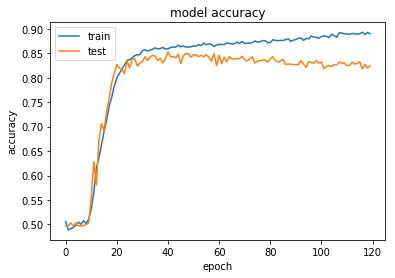

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [71]:
model.save('chatbotModel.h5')

In [72]:
pred_results = model.predict(([inputs_test,queries_test]))

In [74]:
pred_results

array([[2.7781747e-21, 2.7630504e-21, 2.0567426e-21, ..., 2.7204415e-21,
        2.6543731e-21, 2.7908894e-21],
       [2.4661718e-17, 2.8547045e-17, 2.6932289e-17, ..., 3.0234851e-17,
        3.3738676e-17, 3.0859180e-17],
       [1.7672370e-15, 1.3764464e-15, 1.6870365e-15, ..., 1.9226913e-15,
        1.6864960e-15, 1.5295387e-15],
       ...,
       [3.3853710e-22, 3.3823632e-22, 3.2305159e-22, ..., 4.3950897e-22,
        3.7159898e-22, 4.4693804e-22],
       [4.2329591e-21, 6.8693295e-21, 6.2467028e-21, ..., 7.3551381e-21,
        7.9280229e-21, 9.7865160e-21],
       [1.1137354e-12, 1.9966470e-12, 1.6024915e-12, ..., 1.7936171e-12,
        1.9742513e-12, 2.4107233e-12]], dtype=float32)

In [76]:
pred_results.shape

(1000, 38)

In [77]:
val_max = np.argmax(pred_results[0])

In [78]:
for key,val in tokenizer.word_index.items():
    if val==val_max:
        k=key

In [79]:
k 

'no'

In [82]:
pred_results[0][val_max]

1.0

In [84]:
my_story = "John left the kitchen . Sandra dropped the football in the garden ."

In [85]:
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [86]:
my_question = "Is the football in the garden ?"

In [87]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [88]:
mydata = [(my_story.split(),my_question.split(),'yes')]

In [89]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [90]:
pred_results = model.predict(([ my_story, my_ques]))

In [91]:
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  yes
Probability of certainty was:  0.9571666
